In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
C2023II = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2023II.csv')
C2024I = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2024I.csv')
C2024II = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2024II.csv')
# C2025I = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2025I.csv')

In [4]:
#creamos una columna con el periodo del examen para cada periodo
C2023II['periodo'] = "2023II"
C2024I['periodo'] = "2024I"
C2024II['periodo'] = "2024II"
# C2025I['periodo'] = "2025I"



In [5]:
resultados_exam = pd.concat([C2023II, C2024I, C2024II], ignore_index = True)

In [6]:
# resultados_exam.to_csv('resultados_consolidados.csv', index=False)

In [7]:
#cambiamos el nombre de las columnas
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL':'career_1',
    'PUNTAJE FINAL':'score',
    'MERITOE.P':'merit_order',
    'OBSERVACI&OacuteN':'observation'
}

C2023II.rename(columns=columns, inplace = True)

C2023II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24553 entries, 0 to 24552
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   24553 non-null  int64  
 1   full_name    24553 non-null  object 
 2   career_1     24553 non-null  object 
 3   score        24099 non-null  float64
 4   merit_order  3751 non-null   float64
 5   observation  4205 non-null   object 
 6   periodo      24553 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [8]:
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL':'career_1',
    'PUNTAJE FINAL':'score',
    'MERITOE.P ALCANZA VACANTE':'merit_order',
    'OBSERVACI&OacuteN':'observation',
    'ESCUELA SEGUNDA OPCIÓN':'career_2'
}

C2024I.rename(columns=columns, inplace = True)

C2024I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28862 entries, 0 to 28861
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   28862 non-null  int64  
 1   full_name    28862 non-null  object 
 2   career_1     28862 non-null  object 
 3   score        28527 non-null  float64
 4   merit_order  2124 non-null   float64
 5   observation  2459 non-null   object 
 6   career_2     303 non-null    object 
 7   periodo      28862 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [9]:
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL (PRIMERA OPCIÓN)':'career_1',
    'PUNTAJE':'score',
    'MERITOE.P':'merit_order',
    'OBSERVACI&OacuteN':'observation',
    'ESCUELA PROFESIONAL (SEGUNDA OPCIÓN)':'career_2'
}

C2024II.rename(columns=columns, inplace = True)

C2024II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   22077 non-null  int64  
 1   full_name    22077 non-null  object 
 2   career_1     22077 non-null  object 
 3   score        21868 non-null  float64
 4   merit_order  2630 non-null   float64
 5   observation  2839 non-null   object 
 6   career_2     512 non-null    object 
 7   periodo      22077 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ MB


In [10]:
# #cambiamos el nombre de las columnas
# columns = {
#     'CODIGO':'student_id',
#     'APELLIDOS Y NOMBRES':'full_name',
#     'ESCUELA PROFESIONAL':'career_1',
#     'PUNTAJE':'score',
#     'MERITOE.P':'merit_order',
#     'OBSERVACI&OacuteN':'observation'
# }

# C2025I.rename(columns=columns, inplace = True)

# C2025I.info()

In [11]:
#anexamos los dataframes

resultados_exam = pd.concat([C2023II, C2024I, C2024II], ignore_index = True)

In [12]:
resultados_exam.sample(10)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2
66889,550401,"KRAMMER HURTADO, OLIVER CHRISTOF",PRESUPUESTO Y FINANZAS PÚBLICAS - LIMA,860.375,NaN,NaN,2024II,NaN
71375,197217,"ALVARADO LIVIA, ABRAHAM CRISTHOFER",PSICOLOGÍA - LIMA,500.125,NaN,NaN,2024II,NaN
36511,175312,"RODRIGUEZ VEGA, LUCIA MASSIEL STACEY",ODONTOLOGÍA,733.875,NaN,NaN,2024I,NaN
14677,561165,"ALMONACID MENDIZABAL, CAMILA GABRIELA",AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO,986.000,11.0,ALCANZO VACANTE,2023II,NaN
31373,121707,"BALBIN LOPEZ, PAOLA JOSSY",NUTRICION,322.625,NaN,NaN,2024I,NaN
5850,780809,"BUITRÓN SULCA, YAMIR ALESSANDRO",DERECHO,1112.750,81.0,ALCANZO VACANTE,2023II,NaN
41376,585162,"PERALTA JAUREGUI, MIGUEL FARID",CONTABILIDAD - LIMA,1135.000,27.0,ALCANZO VACANTE,2024I,NaN
8120,822168,"MALLQUI VENTURA, MARGARITA DEL CARMEN",CIENCIA POLÍTICA,745.125,NaN,NaN,2023II,NaN
15449,581854,"SALCEDO CORREA, FABRIZZIO YAFAR",ECONOMÍA,1008.500,NaN,NaN,2023II,NaN
12916,584301,"QUILICHE MENESES, ANDREY YAZCID",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES - LIMA,733.625,NaN,NaN,2023II,NaN


In [13]:
resultados_exam['location'] = resultados_exam['career_1'].str.extract(r' - (.+)')  # Extraer 'LIMA'
resultados_exam['career_1'] = resultados_exam['career_1'].str.replace(r' - .+', '', regex=True)  # Remover '- LIMA' de 'career_1'

In [14]:
resultados_exam.sample(10)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
25461,890346,"CARRILLO CASTILLO, BRENDA ABIGAIL",MEDICINA HUMANA,903.750,NaN,NaN,2024I,NaN,NaN
18365,291079,"SIPION ANTON, KARELL MAURICIO",INGENIERÍA CIVIL,739.250,NaN,NaN,2023II,NaN,NaN
32562,734763,"GALLARDO LOPEZ, CAMILA D'ARIEN",DERECHO,451.625,NaN,NaN,2024I,NaN,NaN
64035,592528,"GUTIERREZ VERA, ASTRID GRUSHENKA",ADMINISTRACIÓN,753.625,NaN,NaN,2024II,NaN,LIMA
59883,713957,"MORENO MERMA, LENNI AARON WILLIAM",DERECHO,966.000,NaN,NaN,2024II,NaN,LIMA
47844,190755,"ALMANZA LAQUI, KIMBERLY SALUSTIANA",PSICOLOGÍA,330.500,NaN,NaN,2024I,NaN,NaN
1425,852824,"GOMEZ HUERTA, JORGE ALEXANDER",MEDICINA HUMANA,690.250,NaN,NaN,2023II,NaN,NaN
58230,102208,"VASQUEZ QUISPE, JORGE ALDAIR",TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,542.625,NaN,NaN,2024II,NaN,NaN
37471,261237,"VILA ÃAUPA, ANTHONY RAFAEL",INGENIERÍA QUÍMICA,795.875,NaN,NaN,2024I,NaN,NaN
37979,110518,"QUISPE CCAÃIHUA, AIXA MILDRED",MEDICINA VETERINARIA,774.750,NaN,NaN,2024I,NaN,NaN


In [15]:
resultados_exam['periodo'].unique()

array(['2023II', '2024I', '2024II'], dtype=object)

In [16]:
resultados_exam['observation'].unique()

array([nan, 'ALCANZO VACANTE', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO',
       'ALCANZO VACANTE SEGUNDA OPCIÃ\x93N',
       'ALCANZO VACANTE PRIMERA OPCIÃ\x93N'], dtype=object)

In [17]:
#corregimos los textos

resultados_exam['observation'] = resultados_exam['observation'].replace({
    'ALCANZO VACANTE SEGUNDA OPCIÃ\x93N':'ALCANZO VACANTE SEGUNDA OPCIÓN',
    'ALCANZO VACANTE PRIMERA OPCIÃ\x93N':'ALCANZO VACANTE PRIMERA OPCION',
    'ALCANZO VACANTE':'ALCANZO VACANTE PRIMERA OPCION'
})

In [18]:
resultados_exam['observation'] = resultados_exam['observation'].fillna('NO ALCANZO VACANTE')
resultados_exam['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO'], dtype=object)

In [19]:
resultados_exam['location'] = resultados_exam['location'].fillna('LIMA')

resultados_exam['location'].unique()

array(['LIMA', 'S.J.L', 'HUARAL', 'VILLA RICA', 'CHILCA', 'OYÓN',
       'HUARMEY'], dtype=object)

In [20]:
resultados_exam['career_2'].unique()

array([nan, 'OBSTETRICIA', 'TOXICOLOGÍA', 'TEC. MED. RADIOLOGÍA',
       'CIENCIAS DE LOS ALIMENTOS', 'TEC. MED. TERAPIA OCUPACIONAL',
       'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN', 'EDUCACIÓN INICIAL',
       'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN',
       'CONSERVACIÓN Y RESTAURACIÓN', 'GEOGRAFÍA', 'ARTE', 'ANTROPOLOGÍA',
       'ARQUEOLOGÍA', 'FILOSOFÍA',
       'PRESUPUESTO Y FINANZAS PÚBLICAS - LIMA', 'ADMINISTRACIÓN - S.J.L',
       'GESTIÓN TRIBUTARIA - LIMA', 'ADMINISTRACIÓN DE TURISMO - LIMA',
       'ECONOMÍA PÚBLICA', 'CONTABILIDAD - S.J.L',
       'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO - LIMA',
       'CIENCIAS BIOLÓGICAS', 'QUÍMICA', 'ESTADÍSTICA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA',
       'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO - S.J.L',
       'INGENIERÍA METALÚRGICA', 'INGENIERÍA AGROINDUSTRIAL',
       'INGENIERÍA QUÍMICA', 'INGENIERÍA ELECTRÓNICA',
       'INGENIERÍA DE TELECOMUNICACIONES',
       'INGENIERÍA MECÁNICA DE FLUIDOS',
       'ING

In [21]:
#analizamos los tipos de datos y corregimos en base a las necesidades para el analisis
resultados_exam['student_id'] = resultados_exam['student_id'].astype(object)

resultados_exam.tail()


,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
75487,297540,"VILCAS OTAÃE, WILLIAMS JEFFREY",CIENCIAS DE LA COMPUTACIÓN,712.500,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA
75488,267514,"VILLAVICENCIO MERELLA, PAOLO ALONSO",CIENCIAS DE LA COMPUTACIÓN,1095.000,10.0,ALCANZO VACANTE PRIMERA OPCION,2024II,NaN,LIMA
75489,296074,"YOLA MUCHCCO, JAIR SEBASTIAN",CIENCIAS DE LA COMPUTACIÓN,838.125,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA
75490,233635,"ZAPATA LLAXA, JORGE ANDRES",CIENCIAS DE LA COMPUTACIÓN,1028.250,17.0,ALCANZO VACANTE PRIMERA OPCION,2024II,NaN,LIMA
75491,239418,"ZAPATA MONTALVO, BENJAMIN JORGE",CIENCIAS DE LA COMPUTACIÓN,795.875,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA


In [22]:
# resultados_exam.to_csv('resultados_consolidados.csv', index=False)

In [23]:
# resultados_exam.to_csv('resultados examen consolidado', index=False)

## EXPLORACION DE LOS DATOS

¿Cuál es la distribución de puntajes entre los estudiantes de diferentes carreras?
Analiza si hay carreras con puntajes consistentemente más altos o más bajos.

¿Qué carrera tiene el puntaje más alto y quién es el estudiante asociado?
Identifica al estudiante con el puntaje más alto y la carrera correspondiente.

¿Cuántos estudiantes lograron alcanzar un puesto vacante en comparación con los que no lo hicieron?
Compara el número de estudiantes que tienen una observación de "ALCANZO VACANTE" frente a aquellos sin esta observación.

¿Cuál es el promedio de puntajes por carrera?
Calcula el promedio de puntajes para cada carrera para ver cómo se comparan entre sí.

¿Hay alguna correlación entre el puntaje y el orden de mérito?
Investiga si existe alguna relación entre las puntuaciones y el orden de mérito, aunque algunos valores sean NaN.

¿Qué porcentaje de estudiantes tiene un puntaje por encima de 600?
Determina cuántos estudiantes tienen un puntaje superior a 600 en relación al total.

¿Cuál es el período con la mayor cantidad de estudiantes y cuál tiene los puntajes más altos?
Analiza la cantidad de estudiantes en cada período y su rendimiento promedio.

¿Existen diferencias notables en puntajes entre las diferentes cohortes de estudiantes (2023II vs. 2024I vs. 2024II)?
Compara los puntajes de los estudiantes en las diferentes cohortes.

¿Qué carreras tienen más estudiantes sin puntaje registrado?
Identifica qué carreras tienen más estudiantes con puntajes NaN.

1. Distribucion de los puntajes de los estudiantes de las carreras

    Se creo una funcion que muestra un histograma con la distribucion de los puntajes por cada carrera y por perido que escogieron los postulantes como primera opcion.

In [24]:
# Definimos la función para analizar la distribución de puntajes por carrera
def hist_career(career, periodo):
    # Filtrar el DataFrame para obtener solo los datos de la carrera deseada
    career_data = resultados_exam[(resultados_exam['career_1'] == career) & (resultados_exam['periodo'] == periodo)]
    
    # Verificar si hay datos para la carrera especificada
    if not career_data.empty:
        # Crear un histograma de los puntajes
        plt.figure(figsize=(10, 6))
        sns.histplot(career_data['score'], bins=10, kde=True)  # Agregar KDE para suavizar la curva
        plt.title(f'DISTRIBUCIÓN DE PUNTAJES EN {career} - {periodo}')
        plt.xlabel('Puntaje')
        plt.ylabel('Frecuencia')
        plt.axvline(career_data['score'].max(), color='red', linestyle='--', label='Puntaje Máximo')
        plt.legend()
        plt.show()
        
        # Imprimir el puntaje máximo
        max_score = career_data['score'].max()
        min_score = career_data[career_data['observation'] == 'ALCANZO VACANTE PRIMERA OPCION']['score'].min()
    
        print(f'EL PUNTAJE MÁXIMO PARA {career} ES {max_score} Y EL PUNTAJE MINIMO ES {min_score} EN EL PERIODO {periodo}')
    else:
        print(f'No hay datos disponibles para la carrera {career}.')

In [25]:
resultados_exam['career_1'].unique()

array(['MEDICINA HUMANA', 'OBSTETRICIA', 'ENFERMERÍA',
       'TEC. MED. LAB. CLÍNICO Y ANATOMÍA PATOLÓGICA',
       'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN',
       'TEC. MED. RADIOLOGÍA', 'TEC. MED. TERAPIA OCUPACIONAL',
       'NUTRICION', 'DERECHO', 'CIENCIA POLÍTICA', 'LITERATURA',
       'FILOSOFÍA', 'LINGUÍSTICA', 'COMUNICACIÓN SOCIAL', 'ARTE',
       'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN', 'DANZA',
       'CONSERVACIÓN Y RESTAURACIÓN', 'FARMACIA Y BIOQUÍMICA',
       'CIENCIAS DE LOS ALIMENTOS', 'TOXICOLOGÍA', 'ODONTOLOGÍA',
       'EDUCACIÓN INICIAL', 'EDUCACIÓN PRIMARIA', 'EDUCACIÓN SECUNDARIA',
       'EDUCACIÓN FÍSICA', 'QUÍMICA', 'INGENIERÍA QUÍMICA',
       'INGENIERÍA AGROINDUSTRIAL', 'MEDICINA VETERINARIA',
       'ADMINISTRACIÓN', 'ADMINISTRACIÓN DE TURISMO',
       'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES',
       'CIENCIAS BIOLÓGICAS', 'GENÉTICA Y BIOTECNOLOGÍA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA', 'CONTABILIDAD',
       'GESTIÓN TRIBUTARIA', 'AUDIT

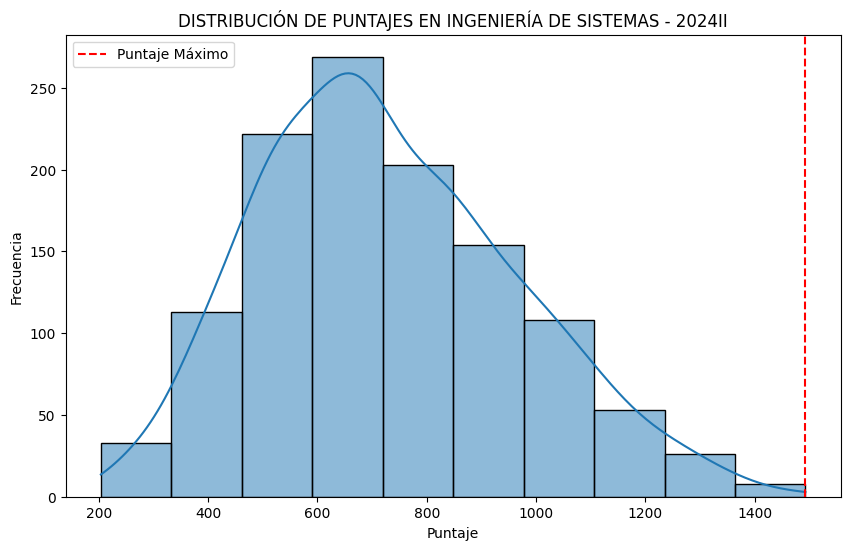

EL PUNTAJE MÁXIMO PARA INGENIERÍA DE SISTEMAS ES 1493.0 Y EL PUNTAJE MINIMO ES 1197.25 EN EL PERIODO 2024II


In [26]:
hist_career('INGENIERÍA DE SISTEMAS', '2024II')  # Reemplaza con la carrera que deseas analizar

Qué carrera tiene el puntaje más alto y quién es el estudiante asociado?
Identifica al estudiante con el puntaje más alto y la carrera correspondiente.

In [27]:
highest_score = resultados_exam.loc[resultados_exam.groupby('periodo')['score'].idxmax()]
highest_score[['full_name','career_1','score', 'periodo']]

,full_name,career_1,score,periodo
7442,"ROJAS BENITES, CAMILA JIMENA",DERECHO,1556.375,2023II
43854,"SALAZAR SEDANO, JOAQUÍN SEBASTIÁN",COMPUTACIÓN CIENTÍFICA,1704.250,2024I
64882,"FUSTAMANTE CUEVA, ISIS MICHELLE",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,1563.125,2024II


¿Cuántos estudiantes lograron alcanzar un puesto vacante en comparación con los que no lo hicieron?
Compara el número de estudiantes que tienen una observación de "ALCANZO VACANTE" frente a aquellos sin esta observación.


In [28]:
resultados_exam['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO'], dtype=object)

In [29]:
vacant_reached = resultados_exam[
    (resultados_exam['observation'] == 'ALCANZO VACANTE PRIMERA OPCION') | (resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') | (resultados_exam['observation'] == 'NO ALCANZO VACANTE')
]

In [30]:
vacant_reached['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION',
       'ALCANZO VACANTE SEGUNDA OPCIÓN'], dtype=object)

In [31]:
comparison = vacant_reached.groupby(['periodo','observation'])['observation'].count().reset_index(name = 'count')
comparison

,periodo,observation,count
0,2023II,ALCANZO VACANTE PRIMERA OPCION,3751
1,2023II,NO ALCANZO VACANTE,20348
2,2024I,ALCANZO VACANTE PRIMERA OPCION,1821
3,2024I,ALCANZO VACANTE SEGUNDA OPCIÓN,303
4,2024I,NO ALCANZO VACANTE,26403
5,2024II,ALCANZO VACANTE PRIMERA OPCION,2118
6,2024II,ALCANZO VACANTE SEGUNDA OPCIÓN,512
7,2024II,NO ALCANZO VACANTE,19238


In [32]:
# Pivotar el DataFrame para tener 'observation' como columnas
pivot_comparison = comparison.pivot(index='periodo', columns='observation', values='count').fillna(0)
pivot_comparison

observation,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,NO ALCANZO VACANTE
periodo,,,
2023II,3751.0,0.0,20348.0
2024I,1821.0,303.0,26403.0
2024II,2118.0,512.0,19238.0


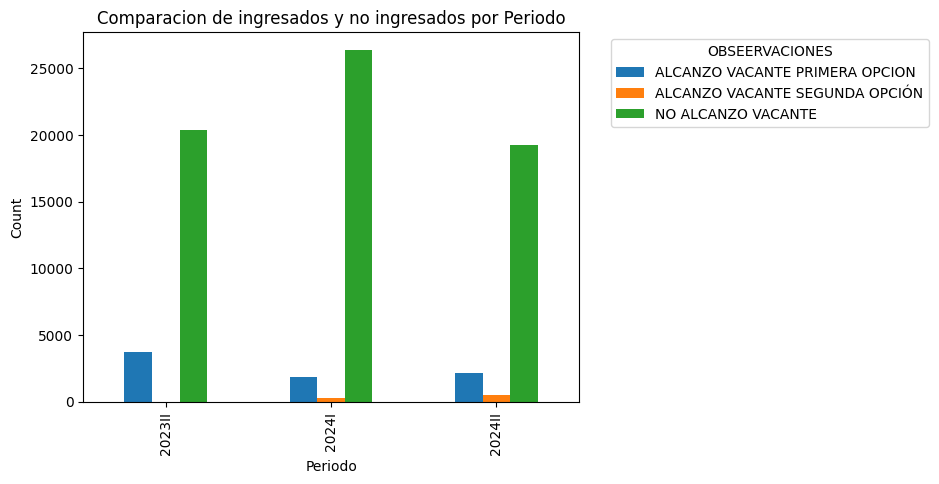

In [33]:
# Crear el gráfico de barras apilado
pivot_comparison.plot(kind = 'bar')
# Configurar etiquetas y título
plt.title('Comparacion de ingresados y no ingresados por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Count')
plt.legend(title='OBSEERVACIONES', bbox_to_anchor=(1.05, 1), loc='upper left')

¿Cuál es el maximo de puntaje por carrera?
Calcula el promedio de puntaje para cada carrera para ver cómo se comparan entre sí.

In [34]:
def mean_score(periodo):

    #filtramos por periodo
    periodo_filter = resultados_exam[resultados_exam['periodo'] == periodo]

    #agrupamos por carrera y mostramos el promedio
    max_score = periodo_filter.groupby('career_1')['score'].max().sort_values(ascending = False).reset_index()
    top10 = max_score.nlargest(20, 'score')
    #creamos un grafico de lineas
    plt.figure(figsize = (10,6))
    sns.lineplot(x = 'career_1', y = 'score', data=top10)
    plt.xlabel('Carrera')
    plt.ylabel('Puntaje maximo')
    plt.title(f'Puntaje maximo por carrera en el periodo {periodo}')
    plt.xticks(rotation = 90)
   


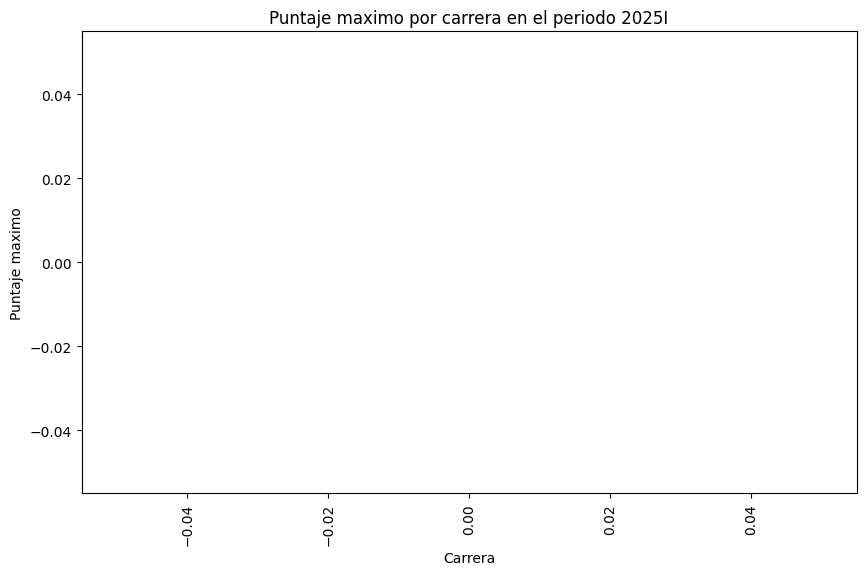

In [35]:
mean_score("2025I")

¿Hay alguna correlación entre el puntaje y el orden de mérito?
Investiga si existe alguna relación entre las puntuaciones y el orden de mérito, aunque algunos valores sean NaN.


In [36]:
df_numerico = resultados_exam.select_dtypes(include = 'number')

In [37]:
correlation = df_numerico.corr()
correlation

,score,merit_order
score,1.000000,-0.247715
merit_order,-0.247715,1.000000


<Axes: >

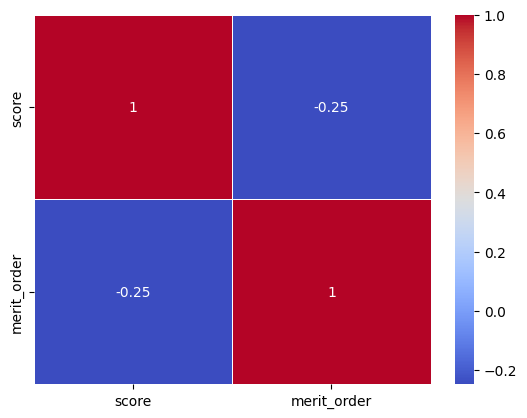

In [38]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', linewidths=0.5)

En primera instancia se puede observar que existe una ligera correlacion negativa entre ambas variables. Se podrá observar mejor con un grafico de regresion

<Axes: xlabel='merit_order', ylabel='score'>

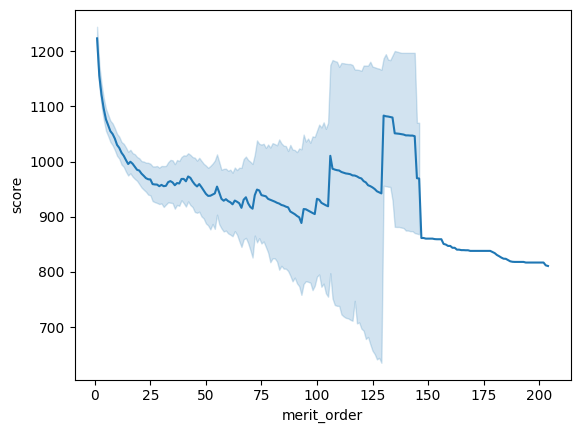

In [39]:
sns.lineplot(x= 'merit_order', y = 'score', data = resultados_exam)

Aqui se puede apreciar una tendencia negativa, ya que los orden de meritos mas cercanos al 0 tienden a tener puntajes mas altos a los que mas alejados. Lo cual es algo obvio, ya que los primeros puestos tienden a tener los puntajes mas altos para que puedan alcanzar una vacante.

¿Qué porcentaje de estudiantes por encima de 900 alcanzaron vacante?
Determina cuántos estudiantes con un puntaje superior a 900 alcanzaron una vacante

In [40]:
def score_900(periodo):
    score_period = resultados_exam[(resultados_exam['periodo'] == periodo) & (resultados_exam['score'] >= 900)] #filtramos por periodo y por puntajes mayores o iguales 900

    proportion = score_period.groupby('observation')['observation'].count().reset_index(name = 'count')  #agrupamos por observacion para contar cuantos postulantes alcanzaron vacantes
    proportion['proportion'] = proportion['count'] / proportion['count'].sum() * 100 # mostramos el porcentaje
    
    labels = proportion['observation'] #denominamos las etiquetas
    plt.pie(proportion['proportion'], labels=labels, autopct= '%1.1f%%') #mostramos los porcentajes en un grafico de pie
    plt.title(f"PROPORCION DE LOS POSTULANTES CON PUNTAJE MAYOR A 900 PUNTOS DEL {periodo}")


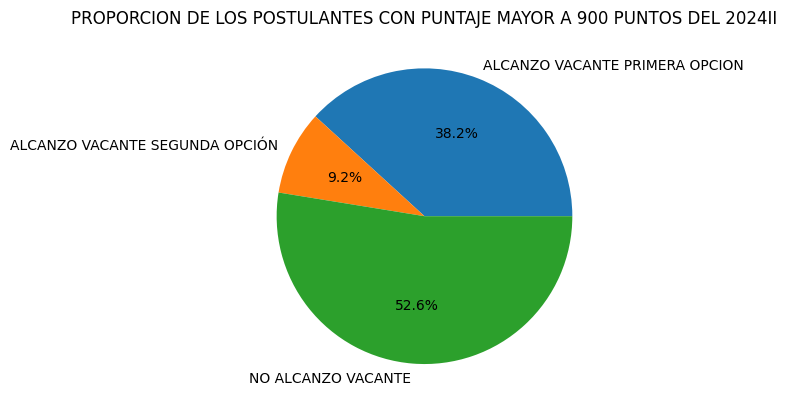

In [41]:
score_900('2024II')

¿Cuál es el período con la mayor cantidad de estudiantes y cuál tiene los puntajes más altos?
Analiza la cantidad de estudiantes en cada período y su rendimiento promedio.

In [42]:
period_high = resultados_exam.groupby('periodo').agg({'full_name':'nunique', 'score':'max'}).reset_index()
period_high

,periodo,full_name,score
0,2023II,24553,1556.375
1,2024I,28862,1704.250
2,2024II,22077,1563.125


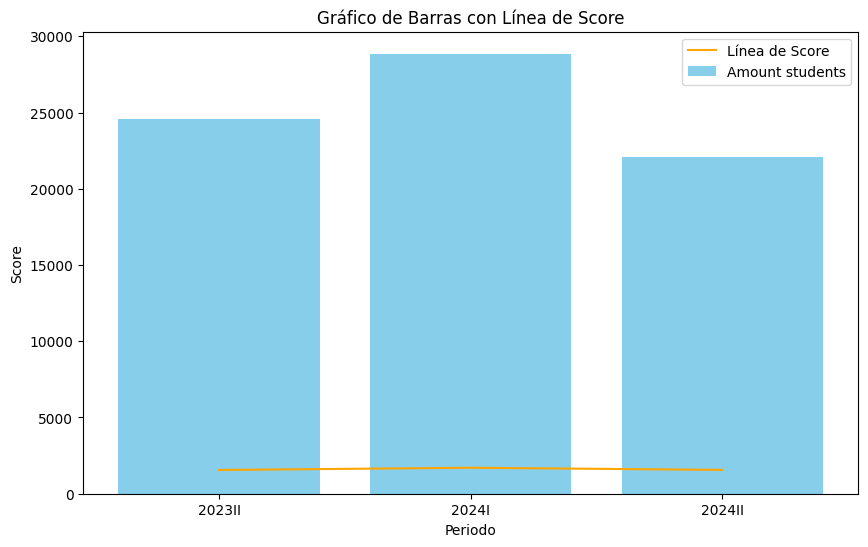

In [43]:
plt.figure(figsize=(10, 6))
x = range(len(period_high['periodo']))

# Graficar las barras
plt.bar(x, period_high['full_name'], label='Amount students', color='skyblue')

# Graficar la línea de score
plt.plot(x, period_high['score'], color='orange', label='Línea de Score')

# Configuración del gráfico
plt.xticks(x, period_high['periodo'])
plt.xlabel('Periodo')
plt.ylabel('Score')
plt.title('Gráfico de Barras con Línea de Score')
plt.legend()


# Mostrar el gráfico
plt.show()

¿Existen diferencias notables en puntajes entre las diferentes cohortes de carreras (2023II vs. 2024I vs. 2024II)?
Compara los puntajes de las carreras en las diferentes cohortes.

In [44]:
def cohort_career(career):
    career_filtered = resultados_exam[(resultados_exam['career_1'] == career) & (resultados_exam['observation'] == 'ALCANZO VACANTE PRIMERA OPCION')]

    if not career_filtered.empty:
         cohort_students = career_filtered.pivot_table(index = 'career_1', columns='periodo', values='score', aggfunc='max')
         print(cohort_students)
         sns.heatmap(cohort_students, annot=True, fmt=".2f")
         plt.xlabel('Periodo')
         plt.ylabel('')
         plt.show()
    else:
        print('No se encontraron datos para la carrera seleccionada')


periodo                                       2023II     2024I    2024II
career_1                                                                
ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES  1331.875  1556.375  1563.125


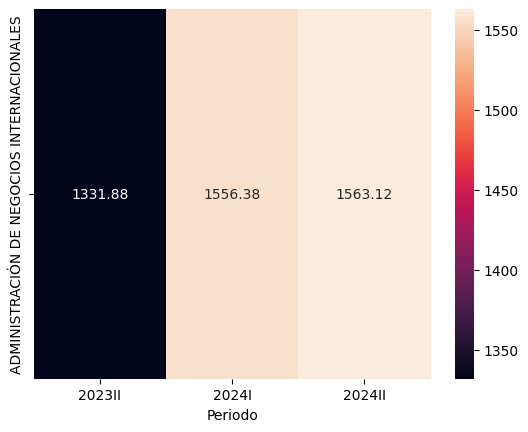

In [45]:
cohort_career('ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES')


¿Qué carreras tienen más estudiantes sin puntaje registrado?
Identifica qué carreras tienen más estudiantes con puntajes NaN.


In [46]:
#filtramos el dataframe con los postulantes que no ingresaron
sin_vacante = resultados_exam[(resultados_exam['observation'] == 'NO ALCANZO VACANTE')]
sin_vacante

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
0,855168,"ABAD GRANDA, ANDRE FAHET",MEDICINA HUMANA,774.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
1,860373,"ABAD NEYRA, ANDREA TAIS",MEDICINA HUMANA,299.000,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
2,894207,"ABAD ONCOY, MARIA BELÉN",MEDICINA HUMANA,441.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
3,875677,"ABAL PRINCIPE, INGRID",MEDICINA HUMANA,530.500,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
4,855333,"ABANTO ARAUJO, PERCY ANGEL",MEDICINA HUMANA,584.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
...,...,...,...,...,...,...,...,...,...
75484,226718,"VASQUEZ ROBLES, ANGEL GABRIEL",CIENCIAS DE LA COMPUTACIÓN,738.625,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA
75485,251637,"VEGA LLANOS, WILLIAM OBER",CIENCIAS DE LA COMPUTACIÓN,573.000,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA
75487,297540,"VILCAS OTAÃE, WILLIAMS JEFFREY",CIENCIAS DE LA COMPUTACIÓN,712.500,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA
75489,296074,"YOLA MUCHCCO, JAIR SEBASTIAN",CIENCIAS DE LA COMPUTACIÓN,838.125,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA


In [47]:
observation = sin_vacante.pivot_table(index='observation', columns='periodo', values='student_id', aggfunc='count').sort_values(by = 'observation',ascending=False).reset_index()
observation

periodo,observation,2023II,2024I,2024II
0,NO ALCANZO VACANTE,20348,26403,19238


In [48]:
# Convertir a formato largo con melt
df_melt = observation.melt(id_vars='observation', var_name='periodo', value_name='cantidad')
df_melt

,observation,periodo,cantidad
0,NO ALCANZO VACANTE,2023II,20348
1,NO ALCANZO VACANTE,2024I,26403
2,NO ALCANZO VACANTE,2024II,19238


Text(0.5, 1.0, 'CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTES POR PERIODO')

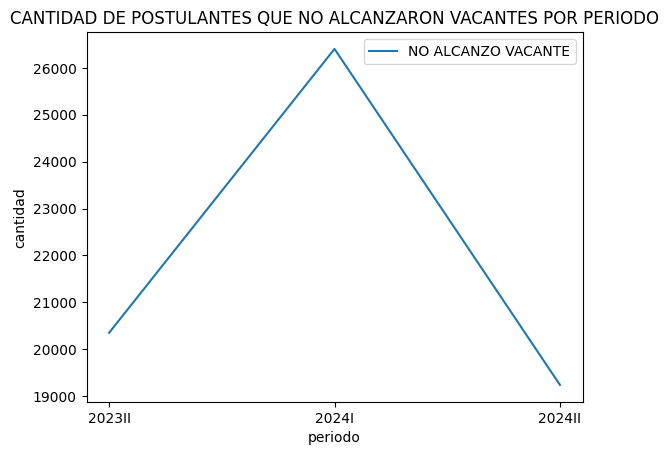

In [49]:
labels = ['NO ALCANZO VACANTE']
sns.lineplot(x='periodo', y='cantidad', data=df_melt)
plt.legend(labels=labels)
plt.title('CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTES POR PERIODO')

In [50]:
def wo_vacant(career):
    
    sin_vacante_filtered = sin_vacante[sin_vacante['career_1'] == career]

    if not sin_vacante_filtered.empty:
     wo_lineplot = sin_vacante_filtered.pivot_table(index = 'career_1', columns='periodo', values='student_id', aggfunc='count').reset_index()

     career_wo_vacant_melt = wo_lineplot.melt(id_vars= 'career_1', var_name='periodo', value_name='cantidad')
     sns.lineplot(x='periodo', y='cantidad', data=career_wo_vacant_melt, marker = 'o')
     plt.title(f'CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTE DE {career}')
     for i in range(career_wo_vacant_melt.shape[0]):
        plt.text(career_wo_vacant_melt['periodo'][i], career_wo_vacant_melt['cantidad'][i], str(career_wo_vacant_melt['cantidad'][i]), 
             ha='center', va='bottom')

    else:
        print(f'No se encontraron datos para la carrera de {career}')
    
    return career_wo_vacant_melt


,career_1,periodo,cantidad
0,INGENIERÍA DE SOFTWARE,2023II,624
1,INGENIERÍA DE SOFTWARE,2024I,794
2,INGENIERÍA DE SOFTWARE,2024II,536


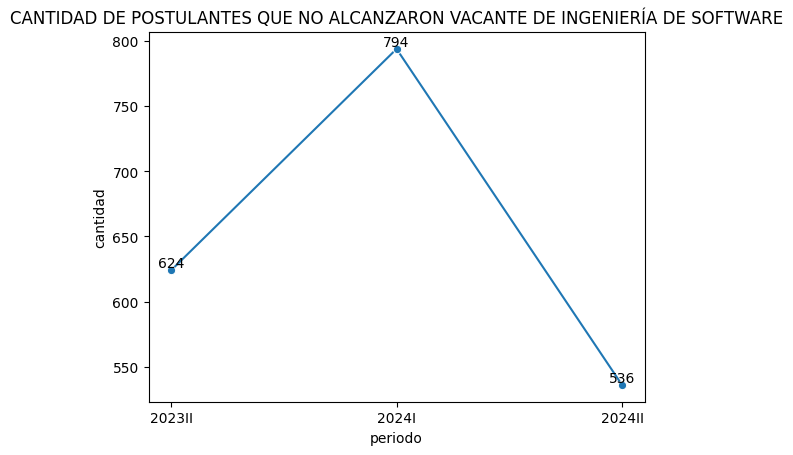

In [51]:
wo_vacant('INGENIERÍA DE SOFTWARE')

In [52]:
resultados_exam.head()

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
0,855168,"ABAD GRANDA, ANDRE FAHET",MEDICINA HUMANA,774.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
1,860373,"ABAD NEYRA, ANDREA TAIS",MEDICINA HUMANA,299.000,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
2,894207,"ABAD ONCOY, MARIA BELÉN",MEDICINA HUMANA,441.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
3,875677,"ABAL PRINCIPE, INGRID",MEDICINA HUMANA,530.500,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
4,855333,"ABANTO ARAUJO, PERCY ANGEL",MEDICINA HUMANA,584.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA


In [53]:
resultados_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75492 entries, 0 to 75491
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   75492 non-null  object 
 1   full_name    75492 non-null  object 
 2   career_1     75492 non-null  object 
 3   score        74494 non-null  float64
 4   merit_order  8505 non-null   float64
 5   observation  75492 non-null  object 
 6   periodo      75492 non-null  object 
 7   career_2     815 non-null    object 
 8   location     75492 non-null  object 
dtypes: float64(2), object(7)
memory usage: 5.2+ MB


In [54]:
areas_examen = [
    {'area_code': 'A', 'career_1': 'MEDICINA HUMANA'},
    {'area_code': 'A', 'career_1': 'OBSTETRICIA'},
    {'area_code': 'A', 'career_1': 'ENFERMERÍA'},
    {'area_code': 'A', 'career_1': 'TECNOLOGÍA MÉDICA'},
    {'area_code': 'A', 'career_1': 'LABORATORIO CLÍNICO Y ANATOMÍA PATOLÓGICA'},
    {'area_code': 'A', 'career_1': 'TERAPIA FÍSICA Y REHABILITACIÓN'},
    {'area_code': 'A', 'career_1': 'RADIOLOGÍA'},
    {'area_code': 'A', 'career_1': 'TERAPIA OCUPACIONAL'},
    {'area_code': 'A', 'career_1': 'NUTRICIÓN'},
    {'area_code': 'A', 'career_1': 'FARMACIA Y BIOQUÍMICA'},
    {'area_code': 'A', 'career_1': 'CIENCIAS DE LOS ALIMENTOS'},
    {'area_code': 'A', 'career_1': 'TOXICOLOGÍA'},
    {'area_code': 'A', 'career_1': 'ODONTOLOGÍA'},
    {'area_code': 'A', 'career_1': 'MEDICINA VETERINARIA'},
    {'area_code': 'A', 'career_1': 'PSICOLOGÍA'},
    {'area_code': 'A', 'career_1': 'PSICOLOGÍA ORGANIZACIONAL Y DE LA GESTIÓN HUMANA'},
    {'area_code': 'B', 'career_1': 'QUÍMICA'},
    {'area_code': 'B', 'career_1': 'CIENCIAS BIOLÓGICAS'},
    {'area_code': 'B', 'career_1': 'GENÉTICA Y BIOTECNOLOGÍA'},
    {'area_code': 'B', 'career_1': 'MICROBIOLOGÍA Y PARASITOLOGÍA'},
    {'area_code': 'B', 'career_1': 'FÍSICA'},
    {'area_code': 'B', 'career_1': 'MATEMÁTICA'},
    {'area_code': 'B', 'career_1': 'ESTADÍSTICA'},
    {'area_code': 'B', 'career_1': 'INVESTIGACIÓN OPERATIVA'},
    {'area_code': 'B', 'career_1': 'COMPUTACIÓN CIENTÍFICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA QUÍMICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA AGROINDUSTRIAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA MECÁNICA DE FLUIDOS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA GEOLÓGICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA GEOGRÁFICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE MINAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA METALÚRGICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA CIVIL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA AMBIENTAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA INDUSTRIAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA TEXTIL Y CONFECCIONES'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SEGURIDAD Y SALUD EN EL TRABAJO'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA ELECTRÓNICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA ELÉCTRICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE TELECOMUNICACIONES'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SISTEMAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SOFTWARE'},
    {'area_code': 'E', 'career_1': 'DERECHO'},
    {'area_code': 'E', 'career_1': 'CIENCIA POLÍTICA'},
    {'area_code': 'E', 'career_1': 'LITERATURA'},
    {'area_code': 'E', 'career_1': 'FILOSOFÍA'},
    {'area_code': 'E', 'career_1': 'LINGÜÍSTICA'},
    {'area_code': 'E', 'career_1': 'COMUNICACIÓN SOCIAL'},
    {'area_code': 'E', 'career_1': 'ARTE'},
    {'area_code': 'E', 'career_1': 'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN'},
    {'area_code': 'E', 'career_1': 'DANZA'},
    {'area_code': 'E', 'career_1': 'CONSERVACIÓN Y RESTAURACIÓN'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN INICIAL'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN PRIMARIA'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN SECUNDARIA'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN FÍSICA'},
    {'area_code': 'E', 'career_1': 'HISTORIA'},
    {'area_code': 'E', 'career_1': 'SOCIOLOGÍA'},
    {'area_code': 'E', 'career_1': 'ANTROPOLOGÍA'},
    {'area_code': 'E', 'career_1': 'ARQUEOLOGÍA'},
    {'area_code': 'E', 'career_1': 'TRABAJO SOCIAL'},
    {'area_code': 'E', 'career_1': 'GEOGRAFÍA'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE TURISMO'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES'},
    {'area_code': 'D', 'career_1': 'CONTABILIDAD'},
    {'area_code': 'D', 'career_1': 'GESTIÓN TRIBUTARIA'},
    {'area_code': 'D', 'career_1': 'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA PÚBLICA'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA INTERNACIONAL'},
    {'area_code': 'A', 'career_1': 'TEC. MED. LAB. CLÍNICO Y ANATOMÍA PATOLÓGICA'},
    {'area_code': 'A', 'career_1': 'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN'},
    {'area_code': 'A', 'career_1': 'TEC. MED. RADIOLOGÍA'},
    {'area_code': 'A', 'career_1': 'TEC. MED. TERAPIA OCUPACIONAL'},
    {'area_code': 'A', 'career_1': 'NUTRICION'},
    {'area_code': 'E', 'career_1': 'LINGUÍSTICA'},
    {'area_code': 'D', 'career_1': 'PRESUPUESTO Y FINANZAS PÚBLICAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA BIOMÉDICA'},
    {'area_code': 'B', 'career_1': 'CIENCIA DE LA COMPUTACIÓN'},
    {'area_code': 'E', 'career_1': 'LENGUAS, TRADUCCIÓN E INTERPRETACIÓN'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE LA GASTRONOMÍA'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN MARÍTIMA Y PORTUARIA'},
    {'area_code': 'D', 'career_1': 'MARKETING'},
    {'area_code':'C', 'career_1':'ARQUITECTURA Y URBANISMO'}

]

df_areas = pd.DataFrame(areas_examen)
df_areas.to_csv('areas_sanmarcos', index = False)

In [55]:
uniques = df_areas['career_1'].unique()
uniques

array(['MEDICINA HUMANA', 'OBSTETRICIA', 'ENFERMERÍA',
       'TECNOLOGÍA MÉDICA', 'LABORATORIO CLÍNICO Y ANATOMÍA PATOLÓGICA',
       'TERAPIA FÍSICA Y REHABILITACIÓN', 'RADIOLOGÍA',
       'TERAPIA OCUPACIONAL', 'NUTRICIÓN', 'FARMACIA Y BIOQUÍMICA',
       'CIENCIAS DE LOS ALIMENTOS', 'TOXICOLOGÍA', 'ODONTOLOGÍA',
       'MEDICINA VETERINARIA', 'PSICOLOGÍA',
       'PSICOLOGÍA ORGANIZACIONAL Y DE LA GESTIÓN HUMANA', 'QUÍMICA',
       'CIENCIAS BIOLÓGICAS', 'GENÉTICA Y BIOTECNOLOGÍA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA', 'FÍSICA', 'MATEMÁTICA',
       'ESTADÍSTICA', 'INVESTIGACIÓN OPERATIVA', 'COMPUTACIÓN CIENTÍFICA',
       'INGENIERÍA QUÍMICA', 'INGENIERÍA AGROINDUSTRIAL',
       'INGENIERÍA MECÁNICA DE FLUIDOS', 'INGENIERÍA GEOLÓGICA',
       'INGENIERÍA GEOGRÁFICA', 'INGENIERÍA DE MINAS',
       'INGENIERÍA METALÚRGICA', 'INGENIERÍA CIVIL',
       'INGENIERÍA AMBIENTAL', 'INGENIERÍA INDUSTRIAL',
       'INGENIERÍA TEXTIL Y CONFECCIONES',
       'INGENIERÍA DE SEGURIDAD Y SALUD 

In [56]:
#separamos las ciudades de las carreras para un mejor analisis
#resultados_exam['location_2'] = resultados_exam['career_2'].str.extract(r' - (.+)')  # Extraer 'LIMA'
#resultados_exam['career_2'] = resultados_exam['career_2'].str.replace(r' - .+', '', regex=True)  # Remover '- LIMA' de 'career_1'

In [57]:
def segunda_carrera(carrera, periodo):
    
    segunda_opcion = resultados_exam[(resultados_exam['career_1'] == carrera) & (resultados_exam['periodo'] == periodo) & (resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') ]  

    if not segunda_opcion.empty:
     heat_segundaopcion = segunda_opcion.pivot_table(index='career_2', columns='career_1', values = 'student_id', aggfunc='count').reset_index().sort_values(by = carrera, ascending = False)
     heat_segundaopcion

     plt.figure(figsize=(10,6))
     sns.barplot(x = 'career_2', y = carrera, data=heat_segundaopcion )
     plt.xticks(rotation = 90)
     plt.title(f'CANTIDAD DE ALUMNOS QUE ESCOGEN OTRA CARRERA COMO SEGUNDA OPCION DE LA CARRERA DE {carrera}')

    else:
        print(f'No se encontraron datos para la carrera de {carrera}')
    
    return heat_segundaopcion


career_1,career_2,MEDICINA HUMANA
5,TEC. MED. RADIOLOGÍA,16
1,OBSTETRICIA,15
7,TEC. MED. TERAPIA OCUPACIONAL,10
6,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,9
8,TOXICOLOGÍA,8
0,CIENCIAS DE LOS ALIMENTOS,6
3,PSICOLOGÍA - HUARMEY,2
4,PSICOLOGÍA - VILLA RICA,1
2,PSICOLOGÍA - CHILCA,1


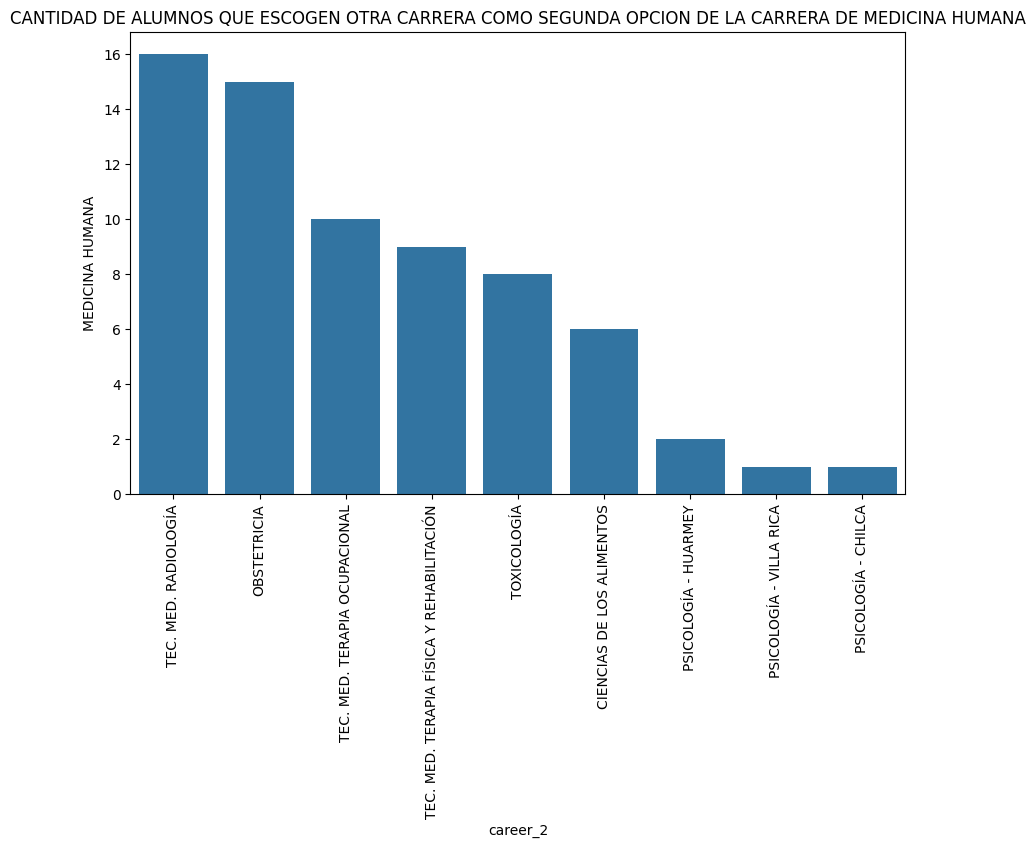

In [58]:
segunda_carrera('MEDICINA HUMANA', '2024II')

In [59]:
segunda_opcion = resultados_exam[(resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') ] 


second_choice = segunda_opcion.pivot_table(index='career_2', columns='career_1', values = 'student_id', aggfunc='count').fillna(0).reset_index()
second_choice.head()

career_1,career_2,ADMINISTRACIÓN,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,CIENCIA POLÍTICA,CIENCIAS DE LA COMPUTACIÓN,COMUNICACIÓN SOCIAL,CONTABILIDAD,DERECHO,ECONOMÍA,...,INGENIERÍA ELECTRÓNICA,INGENIERÍA GEOLÓGICA,INGENIERÍA INDUSTRIAL,"LENGUAS, TRADUCCIÓN E INTERPRETACIÓN",LITERATURA,MARKETING,MEDICINA HUMANA,MEDICINA VETERINARIA,ODONTOLOGÍA,PSICOLOGÍA
0,ADMINISTRACIÓN - HUARAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ADMINISTRACIÓN - S.J.L,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ADMINISTRACIÓN DE LA GASTRONOMÍA,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADMINISTRACIÓN DE TURISMO - LIMA,4.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ADMINISTRACIÓN DE TURISMO - S.J.L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
resultados_exam.columns

Index(['student_id', 'full_name', 'career_1', 'score', 'merit_order',
       'observation', 'periodo', 'career_2', 'location'],
      dtype='object')

In [61]:
df_merge = resultados_exam.merge(df_areas, on='career_1', how = 'outer')
df_merge.sample(5)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location,area_code
53145,867844,"RODAS LAVA, MIGUEL ÁNGEL",MEDICINA HUMANA,443.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,A
43900,239837,"ZÚÃIGA ROJAS, ALEXA MARIANA",INGENIERÍA GEOGRÁFICA,342.875,NaN,NO ALCANZO VACANTE,2024I,NaN,LIMA,C
42087,264001,"REINA HELFER, CARLOS FRANCISCO",INGENIERÍA DE TELECOMUNICACIONES,860.375,NaN,NO ALCANZO VACANTE,2024I,NaN,LIMA,C
62389,846133,"RODRIGUEZ ASTARRIPA, LUCERO TATIANA",MEDICINA HUMANA,1121.750,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA,A
66909,154999,"NIEVES WUTÓN, SULÍ ALEXA",ODONTOLOGÍA,564.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,A


In [62]:
area_periodo_filtered = resultados_exam[resultados_exam['periodo'] == '2023I']

In [63]:
#mostramos un dataframe con el numero de postulantes y numero de ingresantes

competencia = df_merge.pivot_table(index='area_code', columns='observation', values ='student_id', aggfunc='count').fillna(0).reset_index()
competencia['total_estudiantes'] = competencia['ALCANZO VACANTE PRIMERA OPCION'] + competencia['ALCANZO VACANTE SEGUNDA OPCIÓN'] + competencia['ANULADO'] + competencia['AUSENTE'] + competencia['NO ALCANZO VACANTE']

In [64]:
competencia = competencia[
    ['area_code','ALCANZO VACANTE PRIMERA OPCION', 'ALCANZO VACANTE SEGUNDA OPCIÓN', 'total_estudiantes']
].dropna(axis = 1)

In [65]:
competencia

observation,area_code,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,total_estudiantes
0,A,1266.0,138.0,26277.0
1,B,600.0,17.0,2178.0
2,C,1640.0,227.0,19093.0
3,D,2207.0,223.0,13091.0
4,E,1949.0,209.0,14690.0


In [66]:
#cantidad de estudiantes por location y puntajes

score_location = resultados_exam.pivot_table(index='full_name', columns='periodo', values = 'student_id', aggfunc='count').fillna(0)
score_location['total_intentos'] = score_location['2023II'] + score_location['2024I'] + score_location['2024II'] + score_location['2025I']
score_location = score_location[score_location['total_intentos'] > 1]
score_location.sort_values(by = 'total_intentos', ascending=False)

mask = score_location.iloc[:,:-1].head() == 0

sns.heatmap(score_location.iloc[:, :-1].head(),
            linecolor='black',
            mask = mask)

KeyError: '2025I'

In [ ]:
score_location.head()

In [ ]:
score_location_groupby = resultados_exam.groupby('location').agg({
    'score':'max',
    'student_id':'count'
}).fillna(0)

score_location_groupby

In [ ]:
sns.pairplot(resultados_exam)

In [148]:
ingresados = resultados_exam.pivot_table(
    index = 'periodo', columns='observation', values = 'student_id', aggfunc='count'
).fillna(0)

In [149]:
ingresados['total_students'] = ingresados['ALCANZO VACANTE PRIMERA OPCION'] + ingresados['ALCANZO VACANTE SEGUNDA OPCIÓN'] + ingresados['ANULADO'] + ingresados['AUSENTE'] + ingresados['NO ALCANZO VACANTE']


In [150]:
ingresados['PORCENTAJE'] = ingresados['ALCANZO VACANTE PRIMERA OPCION'] / ingresados['total_students'] * 100

In [ ]:
ingresados

In [152]:
funnel_df = resultados_exam.groupby('observation').agg({
    'student_id': 'count'
}).sort_values(by = 'student_id', ascending = False).reset_index()

In [ ]:
funnel_df

In [ ]:
funnel = resultados_exam.pivot_table(
    index = 'career_1',
    columns= 'observation',
    values= 'student_id',
    aggfunc='count'
).fillna(0).reset_index()

funnel['total_studiantes'] = (
        funnel.get('ALCANZO VACANTE PRIMERA OPCION', 0) 
      + funnel.get('ALCANZO VACANTE SEGUNDA OPCION', 0)
      + funnel.get('ANULADO', 0)
      + funnel.get('AUSENTE', 0)
      + funnel.get('NO ALCANZO VACANTE', 0)
)

funnel.head()

In [155]:
melted_df = pd.melt(funnel, 
                     id_vars=['career_1'], 
                     value_vars=['ALCANZO VACANTE PRIMERA OPCION', 'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO', 'AUSENTE', 'NO ALCANZO VACANTE', 'total_studiantes'],
                     var_name='estado', 
                     value_name='cantidad')

In [ ]:
melted_df[melted_df['career_1'] == 'CONTABILIDAD']